In [1]:
# ctrl + shift + p -> interpreter 설정
# png 는 r,g,b,투명채널 --> 사진 하얀배경이 복,붙했을 때 투명으로 적용된다.
# 확장자만 jpg인 파일이 많기에 헤더 확인

a = 4 

In [7]:
# 폴더 내의 자료 찾기
baseFolder = "c:/data/img/"

# import os
# os.listdir(baseFolder) # 파일 명만 나온다.

from glob import glob
glob(baseFolder + '*') # 폴더 경로와 더불어 나온다.


['c:/data/img\\cells.png',
 'c:/data/img\\lena_color.bmp',
 'c:/data/img\\pen.png',
 'c:/data/img\\rice.png',
 'c:/data/img\\Taegeuk.bmp',
 'c:/data/img\\Taegeuk_result.png',
 'c:/data/img\\고등어.png',
 'c:/data/img\\나비.png']

In [8]:
!pip install PILLOW 

## 필수 개념
- 이미지 헤더에 대하여
- 폴더별 자료 읽기

In [10]:
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as  plt
baseFolder="c:/data/img/"
fileList=glob(baseFolder + '*')
sh3,sh4=[],[]
sh3Cnt,sh4Cnt=0,0

for cnt,i in enumerate(fileList):
    img=Image.open(i).resize((100,200))
    imgArr=np.array(img)/255
    #plt.imshow(imgArr)
    #plt.show()
    #print('\n **file=>',i,'-'*20)
    if cnt%3==0: print(cnt , 'bun process')
    if imgArr.shape[2]==3:
        sh3.append(imgArr)
        sh3Cnt+=1
    else:
        sh4.append(imgArr)
        #print('sh4에 추가함')
        sh4Cnt+=1
    
print(sh3Cnt, sh4Cnt)

0 bun process
3 bun process
6 bun process
4 4


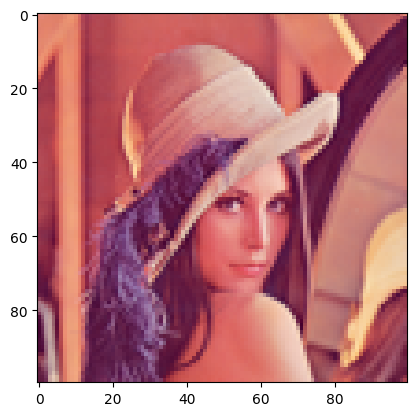

In [11]:
fileName='c:/data/img/lena_color.bmp'
img=Image.open(fileName).resize((100,100))
imgArr=np.array(img)
imgsc=imgArr/255
#imgsc[imgsc[:,:,2]<0.5]=1
plt.imshow(imgsc)

## 이미지 자료의 이해
- 3채널 : (행,열,3), 4채널 (행,열,4)로 출력됨
- png는 상황에 따라 4채널값일수 있음으로 반드시 array할떄 채널수를 확인해야함.

### 참고 : r값이 200이상, g값이 100이상, b값이 50이상이면 [0,0,0]으로 변경

## PIL 모듈을 이용한 이미지 열기 및 array화

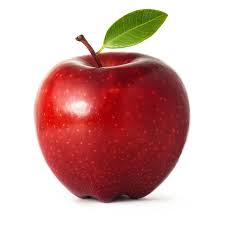

In [12]:
from PIL import Image
img = Image.open('./img/sample.jpg')
img

In [13]:
import numpy as np
type(img), np.shape(img) # 행 225, 열 225 의 3채널 이미지를 뜻함

(PIL.JpegImagePlugin.JpegImageFile, (225, 225, 3))

In [14]:
imgArr = np.array(img)
type(imgArr), imgArr[0] # 1행만 보기

(numpy.ndarray,
 array([[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [

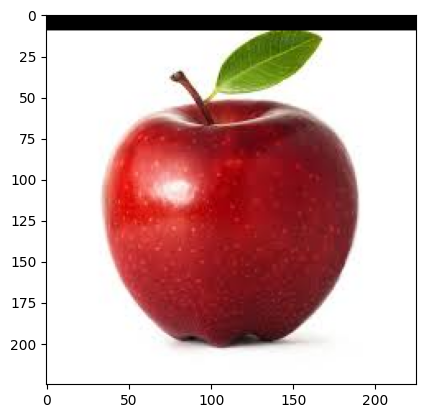

In [15]:
imgArr[:10,:,:] = 0  # 위로 10개의 행에 0값 넣는 브로드 캐스트

## array자료는 차트 명령어로 출력하여 이미지를 확인함

plt.imshow(imgArr)

## 파일 헤더, 파일 시그니처 확인
- 이미지 유형 판단
    * https://docs.python.org/ko/3/library/imghdr.html
- 손상된 jpeg 파일 복구
    * https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=bitnang&logNo=220218322877

In [17]:
import imghdr
print(imghdr.what('./img/sample.jpg'))

# 파일 헤더, 파일 시그니처
# 바이너리 형식으로 파일 열기
# jpeg 파일 형식 : https://yottu.tistory.com/20, https://m.blog.naver.com/nologout/221903980232

with open('./img/sample.jpg', 'rb') as f:
    data = f.read(16)
data.hex()

jpeg


'ffd8ffe000104a464946000101000001'

## 여러개의 이미지 확인
- 폴더내의 이미지 파일을 jpg 확장자만 열어서 확인해보면 실제 파일 포맷이 jpg가 아닌 경우가 있음
- 추후 딥러닝 이미지 구축할때 jpg는 3채널, png는 3 또는 4채널이어서 한개의 array가 될수 없는 경우가 있어 문제가 될수 있음.
- 이러한 경우는 이미지 파일을 다시 jpg로 모두 저장하거나 또는 위의 2번에 나온 내용처럼 파일 복구로 헤더값을 통일시키고 작업함

In [23]:
from PIL import Image
from glob import glob
import numpy as np

fileList = glob('./img/*.jpg')  # 작업 폴더 하위의 img 폴더의 jpg 파일 보기

for x in fileList:
    img = Image.open(x)
    print('\n ** 파일명은 :', x, ' -> 파일헤더 확인해보니 ==> ', imghdr.what(x))

    with open(x, 'rb') as f:
        data = f.read(16)
    print(data.hex())


 ** 파일명은 : ./img\sample.jpg  -> 파일헤더 확인해보니 ==>  jpeg
ffd8ffe000104a464946000101000001


## 4. 채널 수가 다를때 에러 확인
- 여러개의 이미지를 한개의 numpy 자룔로 append 하면서 작업할때 채널수가 다르면 에러



In [25]:
# 3채널 있어서 에러 나옴
from PIL import Image
from glob import glob
import numpy as np

fileList=glob('./img/*.png')   # 작업폴더 하위의 img 폴더의 jpg 파일 보기
result=[]

for x in fileList:
    img=Image.open(x).resize((100,100))  #이미지를 100,100으로 크기변경
    
    
    img=np.array(img)  # 배열로 변경함
    
    print(x,img.shape)   # shape확인
    result.append(img) # append 해서 여러개의 이미지를 한개의 array에 넣어야 하나, shape이 맞지 않아 에러가 남4
    
np.shape(result)

./img\cells.png (100, 100, 3)
./img\pen.png (100, 100, 4)
./img\rice.png (100, 100, 3)
./img\Taegeuk_result.png (100, 100, 4)
./img\고등어.png (100, 100, 4)
./img\나비.png (100, 100, 4)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (6, 100, 100) + inhomogeneous part.

In [32]:
### 4채널만 append함
## 이렇게 넘파이시킨 자료는 npy자료로 저장가능
from PIL import Image
from glob import glob
fileList = glob('.\\img\\*.png')
result = []

for x in fileList:
    img = Image.open(x).resize((100, 100))

    img = np.array(img)
    if img.shape[2] == 4:
        result.append(img)
print(np.shape(result))
print(result[0][0][0]) # 샘플 출력 0 ~255 사이의 값임

(4, 100, 100, 4)
[0 0 0 0]


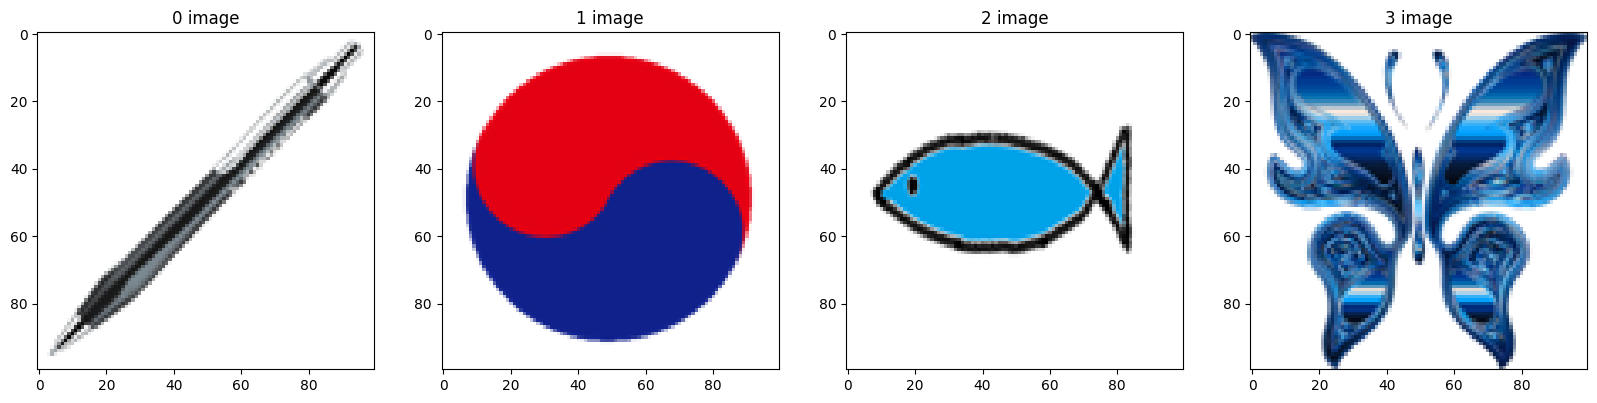

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))
cnt = len(result)

for count, x in enumerate(result):
    plt.subplot(1, cnt, count+1)
    plt.imshow(x)
    plt.title(str(count) + ' image')

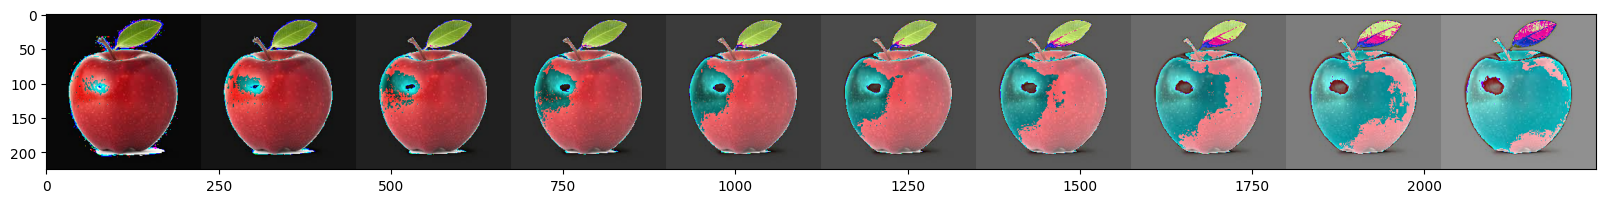

In [55]:
### 사진 연결 기능 이용, 단 plt.title이 불가능함.
plt.figure(figsize = (20, 5))
plt.imshow(np.hstack(result[:])) # hstack은 배열을 옆으로 결합 vstack은 배열을 세로로 결합해주는 것

## 5. 이미지 자료 스케일링
- 0~255자료는 0~1 사이, 또는 0~127, -1~1 사이의 값으로 조정하여 사용가능
- 단 0~255값은 jpg 또는 png등의 이미지 자료이지만 스케일링된 자료는 그림으로 저장시 검정색이 출력됨 (0값이 검정색), 이미지자료지만 numpy 자료로만 보관할 수 있음
- 자료형(uint8)에 따른 이미지의 처리는 3번.html에서 확인함

(4, 100, 100, 4)
[0. 0. 0. 0.]


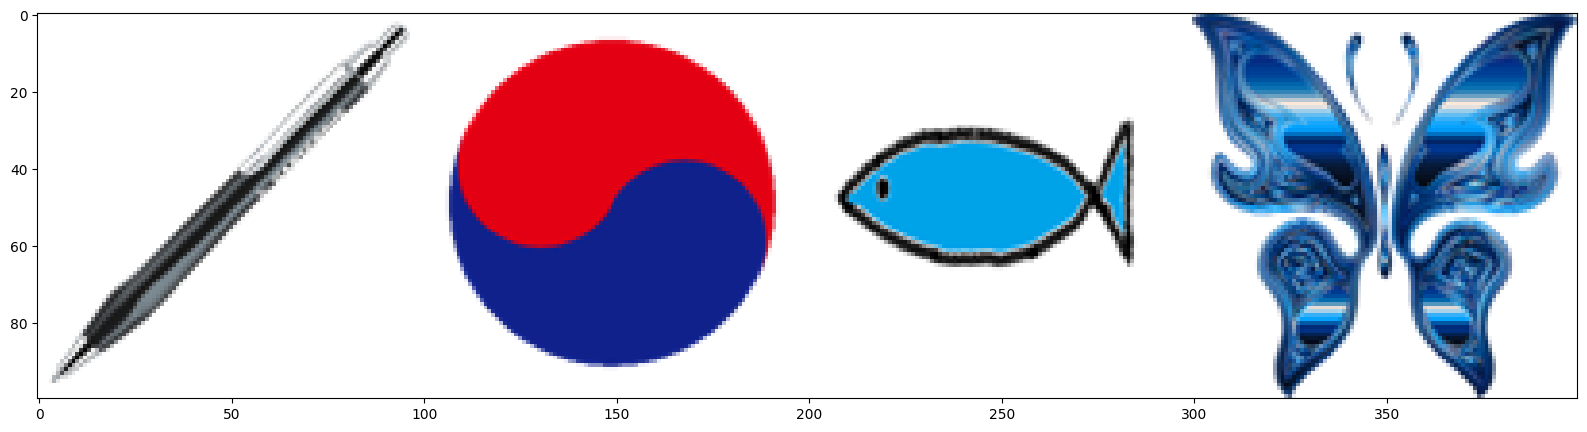

In [33]:
from PIL import Image
from glob import glob
fileList = glob('.\\img\\*.png')
result = []

for x in fileList:
    img =  Image.open(x).resize((100,100))

    img = np.array(img)
    if img.shape[2]==4:
        result.append(img/255)
print(np.shape(result))
print(result[0][0][0]) # 샘플출력 0~1 사이 실수값 (float64가 기본임으로)

### 또는 연결기능 이용, 단 plt.title이 불가능함
plt.figure(figsize=(20,5))
plt.imshow(np.hstack(result[:])) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(4, 100, 100, 4)
[0. 0. 0. 0.]


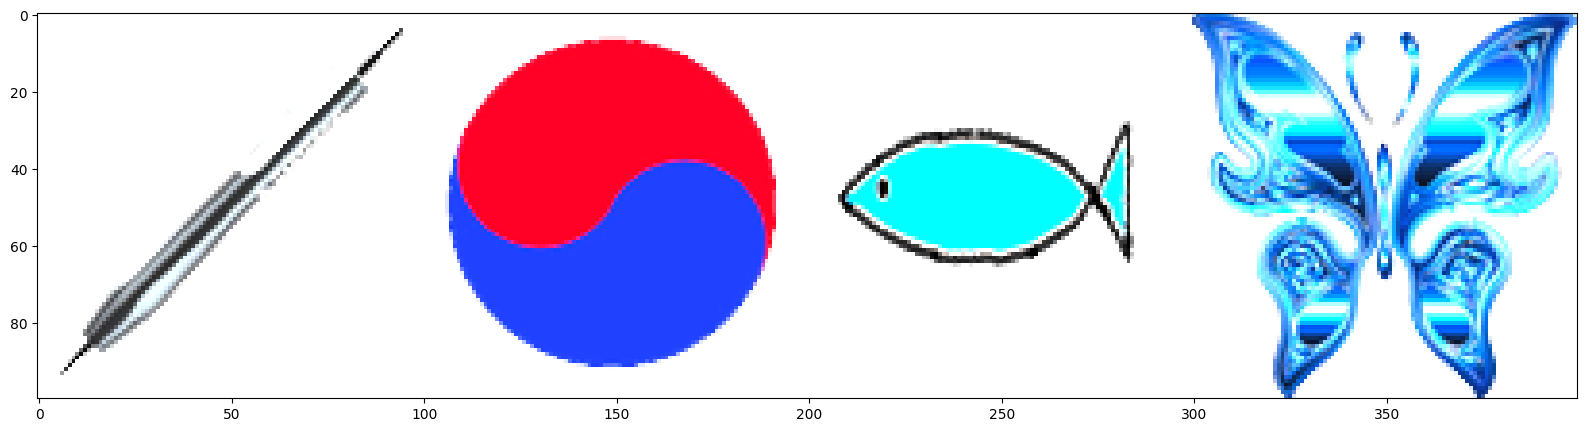

In [37]:
from PIL import Image
from glob import glob
fileList=glob('.\\img\\*.png')
result=[]

for x in fileList:
    img=Image.open(x).resize((100,100))
    
    img=np.array(img)
    if img.shape[2]==4:
   
        result.append(img/127)
print(np.shape(result))
print(result[0][0][0]) # 샘플출력 0~1 사이 실수값 (float64가 기본임으로)

### 또는 연결기능 이용, 단 plt.title이 불가능함
plt.figure(figsize=(20,5))
plt.imshow(np.hstack(result[:])) 

## *참고*
### 이미지 색상값의 변화
- 브로드 캐스트 연산을 통해 할수 있음.


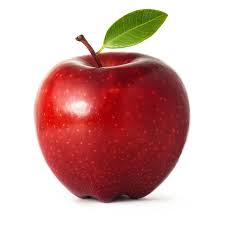

In [41]:
from PIL import Image
from glob import glob

fileList = glob('.\\img\\*.jpg')

img = Image.open(fileList[1])
img

## 이미지의 색의 밝기 변경
- 검정색에서 흰색으로 변하는 것
- 원래값에다가 +00 을 계속 진행하는 것 [r,g,b]를 모두 다 변경함
- 255가 넘어간다면??

In [52]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
img = Image.open(fileList[1])
img = np.array(img)
img
print(img[0])
print('-'*50)
print(img[0]*50)  # 배열 구조가 맞지 않아 브로드캐스트가 안됨
print('-'*50)

print(img[0]*[5,5,5])  # 원칙은 r,g,b에 이렇게 넣어야함

print('-'*50) 
print(img[0]*[[[5]]])  # rgb를 한번에 하려면 [[[  값 ]]] 으로 해야함

[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 

<Figure size 2000x1000 with 0 Axes>

In [61]:
# 이 방법은 제대로 된 밝기조절 브로드캐스트가 아님
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))


img=Image.open(fileList[1])
img=np.array(img)

result=[]
for x in range(10):
    x=x+10
    img=img+x               ##### 브로드캐스트값이 이상하게 나옴
    result.append(img)
re=np.hstack(result[:])
plt.imshow(re)
np.min(re), np.max(re)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

<Figure size 2000x1000 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 480)

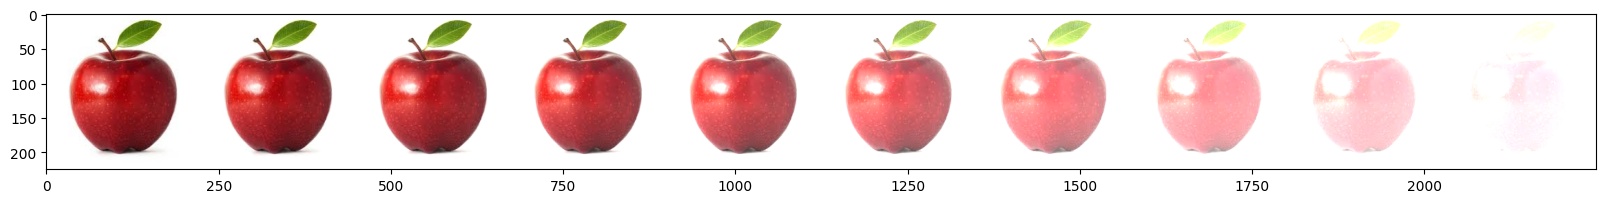

In [59]:
# 이 방법은 제대로 된 밝기조절 브로드캐스트
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))


img=Image.open(fileList[0])
img=np.array(img)
result=[]

for x in range(10):
    x = x*5
    img = img+[x,x,x]  # img + [[[x]]]
    result.append(img)

re = np.hstack(result[:])
plt.imshow(re)
np.min(re), np.max(re)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-225, 255)

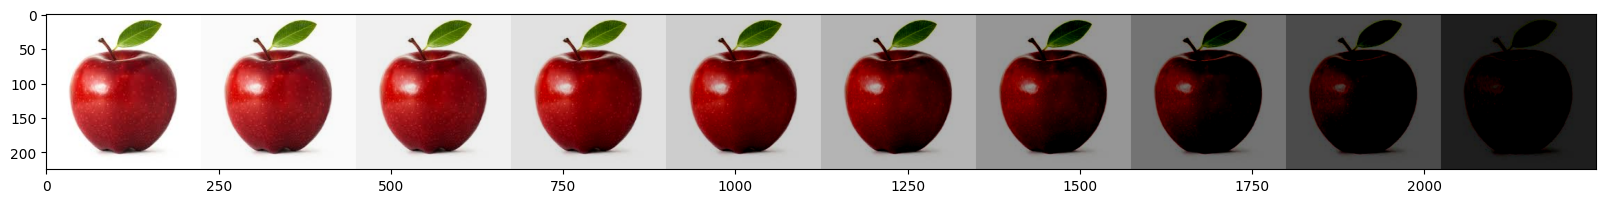

In [60]:
# 이 방법은 제대로 된 밝기조절 브로드캐스트
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))


img=Image.open(fileList[0])
img=np.array(img)
result=[]

for x in range(10):
    x = x*5
    img = img-[x,x,x]  # img + [[[x]]]
    result.append(img)

re = np.hstack(result[:])
plt.imshow(re)
np.min(re), np.max(re)

In [ ]:
# 붉은색만 점점 없애기
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))


img=Image.open(fileList[0])
img=np.array(img)
result=[]
for x in range(10):
    x=x+10
    img=img-[x,0,0]  # img+[[[x]]]
    result.append(img)
re=np.hstack(result[:])
plt.imshow(re)
np.min(re), np.max(re)

## 이미지 numpy 변환하여 저장
- npy 저장
- npz 저장
- jpg 파일을 array로 꺠저있는 것을 불러와야한다.


In [65]:
from PIL import Image
from glob import glob

fileList = glob('c:/data/img/*')
file = fileList[0]

Image.open(file).resize=((20,30)) # 이미지 불러오기
imgArr = np.array(img)/256  # 스케일링
np.save('c:/data/test.npy',imgArr)  # npy로 저장


In [67]:
file = np.load('c:/data/test.npy') # 저장된 npy 불러오기
np.min(file), np.max(file)   # 스케일링 되어있는지 확인 (소수점으로 되어있으면 스케일링이 되어있는 것이다.) 단, 스케일링을 256으로했는지 255로했는지는 모른다.

(0.0, 0.99609375)

- npz 저장
    - 2개 이상의 array를 저장하는 경우 압축 넘파이로 저장함
    

In [77]:
from PIL import Image
from glob import glob

# 첫번째 데이터
x,y = [], []

fileList = glob('c:/data/img/*')
file= fileList[0]

Image.open(file).resize=((20,30)) # 이미지 불러오기
imgArr = np.array(img)/256  # 스케일링
np.save('c:/data/test.npy',imgArr)  # npy로 저장

x.append(imgArr)
y.append('cells')

# 두번째 데이터

file= fileList[1]
Image.open(file).resize=((20,30)) # 이미지 불러오기
imgArr = np.array(img)/256  # 스케일링
np.save('c:/data/test.npy',imgArr)  # npy로 저장

x.append(imgArr)
y.append('leana_color')

In [123]:
from PIL import Image
from glob import glob

# 첫번째 데이터
x,y = [], []

fileList = glob('c:/data/img/*')

for file in fileList:
    img = Image.open(file).resize((20,30)) # 이미지 불러오기
    imgArr = np.array(img)/256  # 스케일링
    print(imgArr.shape)
    if imgArr.shape[2] == 3:

        x.append(imgArr)
        name = file.split('\\')[1]     # 파일명 추출
        fileName = name.split('.')[0]  # 파일명 추출
        y.append(fileName)

np.savez('c:/data/imgsXY.npz', xData = x, yData = y)


(30, 20, 3)
(30, 20, 3)
(30, 20, 4)
(30, 20, 3)
(30, 20, 3)
(30, 20, 4)
(30, 20, 4)
(30, 20, 4)


In [115]:
npzList = np.load('c:/data/imgsXY.npz')
xx, yy = npzList['xData'], npzList['yData']
np.shape(xx), np.shape(yy)

((4, 30, 20, 3), (4,))

In [113]:
np.min(xx), np.max(xx)

(0.0, 0.99609375)

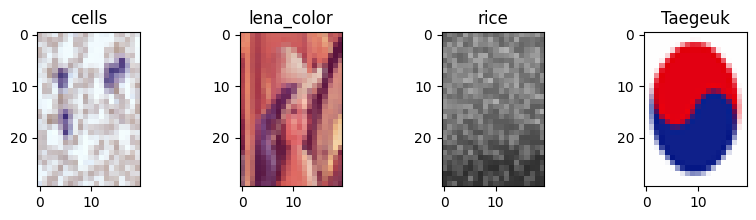

In [107]:
cnt = 1
plt.figure(figsize=(10, 2))
for x,y in zip(xx, yy):
    plt.subplot(1, len(xx), cnt)
    plt.imshow(x)
    plt.title(y)
    cnt+=1

In [117]:
!pip install tensorflow-cpu

     ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
     --------------------------------------- 0.6/272.9 MB 12.2 MB/s eta 0:00:23
     --------------------------------------- 1.4/272.9 MB 18.2 MB/s eta 0:00:15
     --------------------------------------- 2.9/272.9 MB 20.3 MB/s eta 0:00:14
      -------------------------------------- 5.2/272.9 MB 27.4 MB/s eta 0:00:10
     - ------------------------------------- 7.7/272.9 MB 35.0 MB/s eta 0:00:08
     - ------------------------------------ 11.0/272.9 MB 46.9 MB/s eta 0:00:06
     - ------------------------------------ 14.3/272.9 MB 59.5 MB/s eta 0:00:05
     -- ----------------------------------- 17.7/272.9 MB 73.1 MB/s eta 0:00:04
     -- ----------------------------------- 21.1/272.9 MB 73.1 MB/s eta 0:00:04
     --- ---------------------------------- 24.6/272.9 MB 81.8 MB/s eta 0:00:04
     --- ---------------------------------- 28.1/272.9 MB 81.8 MB/s eta 0:00:03
     ---- --------------------------------- 31.

## jpg나 png와 같은 파일로 존재하지 않는 이미지 처리시에 load로 array를 불러와서 사용하고자 할때는 npy 또는 npz로 저장함
- 인공지능 데이터셋은 일반적으로 train_x, train_y, test_x, test_y로 저장되지만 공식은 없음.

In [118]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
np.shape(x_train),np.shape(y_train)

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [119]:
xx=x_train[:5]
yy=y_train[:5]

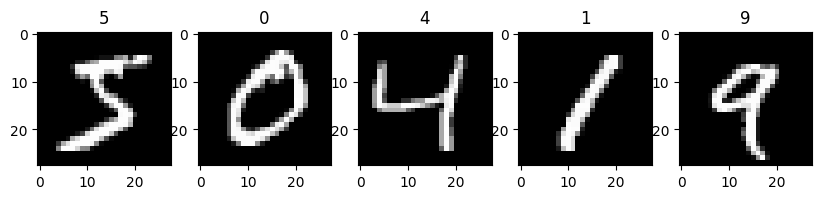

In [120]:
cnt=1
plt.figure(figsize=(10,2))
for x,y in zip(xx,yy):
    plt.subplot(1,len(xx),cnt)
    plt.imshow(x,cmap='gray')
    plt.title(y)
    cnt+=1